## Imports

In [1]:
#base imports
import pandas as pd
import numpy as np
#visualizations
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# modeling imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Loading csv file

In [3]:
housing_df= pd.read_csv('Data/kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


## Finding and Removing Null Values

In [4]:
housing_df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [5]:
housing_df.dropna(inplace = True)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

## Creating new column with zipcodes

In [6]:
housing_df['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States    38
Delridge Way Southwest, Seattle, Washington 98106, United States                24
9th Ave, Nebraska City, Nebraska 68410, United States                           21
South 35th Avenue, Bellevue, Nebraska 68123, United States                      20
15th Avenue, Plattsmouth, Nebraska 68048, United States                         17
                                                                                ..
1867 Northeast 245th Place, Sammamish, Washington 98074, United States           1
4515C Bagley Ave N, Seattle, Washington 98103, United States                     1
2610 34th Avenue West, Seattle, Washington 98199, United States                  1
12512 197th Court Northeast, Woodinville, Washington 98077, United States        1
5505 South Upland Road, Seattle, Washington 98118, United States                 1
Name: address, Length: 29519, dtype: int64

In [7]:
#splitting the zipcode info from the address and creating a new column
housing_df['zipcode'] = housing_df['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')
housing_df['zipcode'] = housing_df['zipcode'].astype(int)

In [8]:
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


## Creating numerical column based on condition values

In [9]:
housing_df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [10]:
housing_df["condition"] = housing_df["condition"].astype('category')
housing_df["condition"] = housing_df["condition"].cat.reorder_categories(
    ["Poor","Fair","Average","Good","Very Good"])

In [11]:
housing_df["condition_code"] = housing_df["condition"].cat.codes
housing_df["condition_code"].value_counts()

2    18515
3     8052
4     3258
1      225
0       61
Name: condition_code, dtype: int64

## Creating numerical column with view values

In [12]:
housing_df["view_code"] = housing_df["view"].astype('category')
categories2 = ["NONE","FAIR","AVERAGE","GOOD","EXCELLENT"]
housing_df["view_code"] = housing_df["view_code"].cat.reorder_categories(categories2)
housing_df["view_code"] = housing_df["view_code"].cat.codes
housing_df["view_code"].value_counts()

0    26555
2     1910
3      877
4      549
1      220
Name: view_code, dtype: int64

## Splitting string and numerical value form the grades column. Creating a new column with grades numerical value

In [13]:
housing_df["grade"].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [14]:
import string
housing_df["grade_str"] = housing_df["grade"].str.strip(string.digits)
housing_df["grade_str"] = housing_df["grade_str"].str.strip()

In [15]:
housing_df["grade_code"] = housing_df["grade_str"].astype('category')
categories = ['Substandard','Poor','Low','Fair','Low Average','Average','Good','Better',
             'Very Good','Excellent','Luxury','Mansion']
housing_df["grade_code"] = housing_df["grade_code"].cat.reorder_categories(categories)
housing_df["grade_code"] = housing_df["grade_code"].cat.codes
housing_df["grade_code"].value_counts()

5     11693
6      9400
7      3804
4      2852
8      1369
9       406
3       385
10      122
2        46
11       24
1         9
0         1
Name: grade_code, dtype: int64

In [16]:
#dropping columns that we are not using
housing_df = housing_df.drop(columns =['id', 'yr_renovated','address', 'long','lat','grade_str'], axis = 1 )

## Removing zip codes not in Kings County

In [17]:
# Creating a dictionary with zipcodes within kings county and corresponding city name
zip_dict = dict({
98002 : "Auburn",
98092: "Auburn",
98224: "Baring",
98004: "Bellevue",
98005: "Bellevue",
98006: "Bellevue",
98007: "Bellevue",
98008: "Bellevue",
98010: "Black Diamond",
98011: "Bothell",
98178: "Bryn Mawr-Skyway",
98148: "Burien",
98166: "Burien",
98014: "Carnation",
98077: "Cottage Lake",
98042: "Covington",
98198: "Des Moines",
98019: "Duvall",
98031: "East Hill-Meridian",
98022: "Enumclaw",
98058: "Fairwood",
98024: "Fall City",
98003: "Federal Way",
98023: "Federal Way",
98027: "Issaquah",
98029: "Issaquah",
98028: "Kenmore",
98032: "Kent",
98030: "Kent",
98033: "Kirkland",
98034: "Kirkland",
98001: "Lakeland North",
98038: "Maple Valley",
98039: "Medina",
98040: "Mercer Island",
98045: "North Bend",
98047: "Pacific",
98050: "Preston",
98051: "Ravensdale",
98052: "Redmond",
98055: "Renton",
98056: "Renton",
98057: "Renton",
98059: "Renton",
98074: "Sammamish",
98075: "Sammamish",
98188: "SeaTac",
98199: "Seattle",
98174: "Seattle",
98154: "Seattle",
98158: "Seattle",
98164: "Seattle",
98101: "Seattle",
98102: "Seattle",
98103: "Seattle",
98104: "Seattle",
98105: "Seattle",
98106: "Seattle",
98107: "Seattle",
98108: "Seattle",
98109: "Seattle",
98112: "Seattle",
98115: "Seattle",
98116: "Seattle",
98117: "Seattle",
98118: "Seattle",
98119: "Seattle",
98121: "Seattle",
98122: "Seattle",
98125: "Seattle",
98126: "Seattle",
98133: "Seattle",
98134: "Seattle",
98136: "Seattle",
98144: "Seattle",
98155: "Shoreline",
98177: "Shoreline",
98288: "Skykomish",
98065: "Snoqualmie",
98168: "Tukwila",
98053: "Union Hill-Novelty Hill",
98195: "Univ Of Washington",
98070: "Vashon",
98146: "White Center",
98072: "Woodinville"})

In [18]:
zip_list = list(zip_dict.keys())

In [19]:
#creating a new dataframe with zipcodes from kings county
housing_df2 = housing_df[housing_df["zipcode"].isin(zip_list)]
housing_df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,zipcode,condition_code,view_code,grade_code
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,98055,3,0,5
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,98133,2,2,5
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,98178,2,2,5
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,98118,2,2,7
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,98027,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,98103,3,0,6
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,98116,2,1,5
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,98122,2,0,5
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,98055,2,0,6


## Seeing correlations between the variables

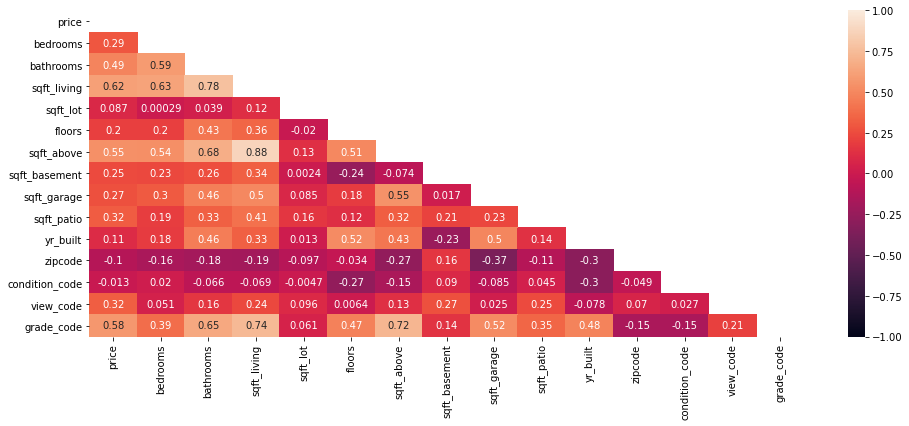

In [20]:
#Creating a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(housing_df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

## Simple Linear Regression - Price & Grade

In [21]:
#Using OLS to view summary

import statsmodels.api as sm

X = housing_df2[['grade_code']]
y = np.log(housing_df2['price'])

simple_model = sm.OLS(endog = y, exog = sm.add_constant(X))

simple_model_results = simple_model.fit()
print(simple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.831e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:26:21   Log-Likelihood:                -18647.
No. Observations:               29149   AIC:                         3.730e+04
Df Residuals:                   29147   BIC:                         3.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9596      0.013    891.255      0.0

In [22]:
# Test Train Split model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [23]:
#Scaling
scaler = StandardScaler()

scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
# Creating linear regression model

In [24]:
#Checking scores
grade_lr = LinearRegression()
grade_lr.fit(X_train_transformed, y_train)
print('train:{}'.format(grade_lr.score(X_train_transformed, y_train)))
print('test:{}'.format(grade_lr.score(X_test_transformed, y_test)))

train:0.3811969987274234
test:0.4050156742180778


In [25]:
y_pred = grade_lr.predict(X_test)

grade_mean = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error =', grade_mean)
grade_r2 = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', grade_r2)

Mean Absolute Error = 2.0452362508672146
Root Mean Square Error = 2.093580000658894


In [26]:
r_squared = grade_lr.score(X_train_transformed, y_train)
r_squared

0.3811969987274234

In [27]:
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_transformed.shape[1]-1))
adj_r2

0.3811757683091549

In [28]:
grade_lr.score(X_test_transformed, y_test)

0.4050156742180778

<AxesSubplot:xlabel='price'>

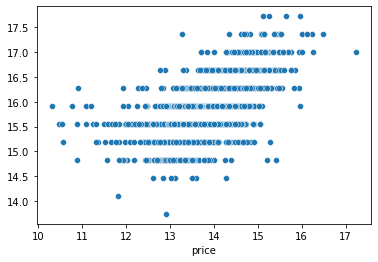

In [29]:
sns.scatterplot(x = y_test, y = y_pred)

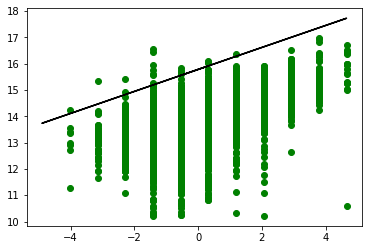

In [30]:
plt.scatter(X_train_transformed, y_train, color = 'g')
plt.plot(X_test_transformed, y_pred, color = 'k')

plt.show()

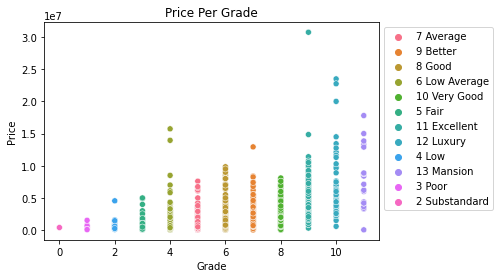

In [31]:
fig, ax = plt.subplots()

sns.scatterplot(x = "grade_code", y = "price",hue = "grade", data = housing_df)
ax.set_title("Price Per Grade")
ax.set_ylabel("Price")
ax.set_xlabel("Grade")

plt.legend(loc='upper left', bbox_to_anchor = (1,1))

plt.show()

## Simple Linear Regression: Price - Condition

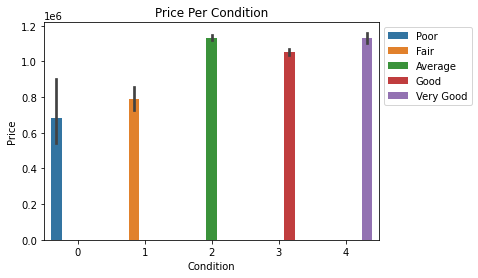

In [32]:
#viewing boxplot of price and condition
fig, ax = plt.subplots()

sns.barplot(x = "condition_code", y = "price",hue = "condition", data = housing_df)
ax.set_title("Price Per Condition")
ax.set_ylabel("Price")
ax.set_xlabel("Condition")

plt.legend(loc='upper left', bbox_to_anchor = (1,1))

plt.show()

In [33]:
X_cond = housing_df2[['condition_code']]
y_cond = np.log(housing_df2['price'])

# Replace None with appropriate code
condition_model = sm.OLS(endog = y_cond, exog = sm.add_constant(X_cond))

condition_model_results = condition_model.fit()
print(condition_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.072
Date:                Fri, 02 Jun 2023   Prob (F-statistic):              0.300
Time:                        11:26:24   Log-Likelihood:                -25752.
No. Observations:               29149   AIC:                         5.151e+04
Df Residuals:                   29147   BIC:                         5.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.7262      0.013   1095.

In [34]:
X_cond_train, X_cond_test, y_cond_train, y_cond_test = train_test_split(X_cond, y_cond, test_size = 0.20, random_state = 42)

In [35]:
cond_lr = LinearRegression()
cond_lr.fit(X_cond_train, y_cond_train)

LinearRegression()

In [36]:
y_cond_pred = cond_lr.predict(X_cond_test)

cond_mean = mean_absolute_error(y_cond_test,y_cond_pred)
print('Mean Absolute Error =', cond_mean)
cond_r2 = mean_squared_error(y_cond_test, y_cond_pred, squared = False)
print('Root Mean Square Error =', grade_r2)

Mean Absolute Error = 0.4408172407902587
Root Mean Square Error = 2.093580000658894


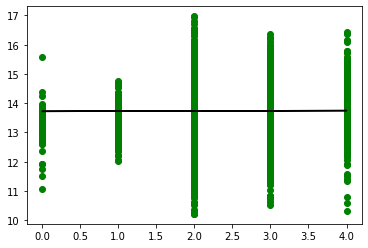

In [37]:
plt.scatter(X_cond_train, y_cond_train, color = 'g')
plt.plot(X_cond_test, y_cond_pred, color = 'k')

plt.show()

## Multiple Linear Regression Model 1 

In [38]:
#Creating a Multiple LR based on the following values:
base = ['bedrooms', 'bathrooms',"sqft_lot",'sqft_above','floors',"sqft_basement",
         'sqft_garage','sqft_patio',"grade_code","view_code","condition_code"]

In [39]:
y = np.log(housing_df2['price'])

X = housing_df2[base]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [40]:
lr = LinearRegression()

lr.fit(X_train_transformed, y_train)
print('train: {}'.format(lr.score(X_train_transformed,y_train)))
print('test: {}:'.format( lr.score(X_test_transformed,y_test)))

train: 0.4726840761954455
test: 0.49888688063050546:


In [41]:
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_transformed.shape[1]-1))
adj_r2

0.3809633839759391

In [42]:
y_pred = lr.predict(X_test_transformed)

MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE)

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE)

Mean Absolute Error = 0.2982228611763957
Root Mean Square Error = 0.4104656958262475


<AxesSubplot:xlabel='price'>

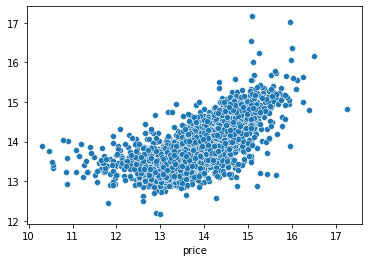

In [43]:
sns.scatterplot(x = y_test, y = y_pred)

## Creating more categoricals: Waterfront, Greenbelt etc..., to see if there is in increase in R2

In [44]:
housing_df2['waterfront'].value_counts()

NO     28641
YES      508
Name: waterfront, dtype: int64

In [45]:
housing_df2["waterfront"] = housing_df2["waterfront"].astype('category')
categories2 = ["NO","YES"]
housing_df2["waterfront"] = housing_df2["waterfront"].cat.reorder_categories(categories2)
housing_df2["waterfront"] = housing_df2["waterfront"].cat.codes
housing_df2["waterfront"].value_counts()

0    28641
1      508
Name: waterfront, dtype: int64

In [46]:
housing_df2['greenbelt'].value_counts()

NO     28380
YES      769
Name: greenbelt, dtype: int64

In [47]:
housing_df2["greenbelt"] = housing_df2["greenbelt"].astype('category')
categories2 = ["NO","YES"]
housing_df2["greenbelt"] = housing_df2["greenbelt"].cat.reorder_categories(categories2)
housing_df2["greenbelt"] = housing_df2["greenbelt"].cat.codes
housing_df2["greenbelt"].value_counts()

0    28380
1      769
Name: greenbelt, dtype: int64

In [48]:
housing_df2['nuisance'].value_counts()

NO     24146
YES     5003
Name: nuisance, dtype: int64

In [49]:
housing_df2["nuisance"] = housing_df2["nuisance"].astype('category')
categories2 = ["NO","YES"]
housing_df2["nuisance"] = housing_df2["nuisance"].cat.reorder_categories(categories2)
housing_df2["nuisance"] = housing_df2["nuisance"].cat.codes
housing_df2["nuisance"].value_counts()

0    24146
1     5003
Name: nuisance, dtype: int64

In [50]:
housing_df2['heat_source'].value_counts()

Gas                  20137
Electricity           5940
Oil                   2898
Gas/Solar               93
Electricity/Solar       57
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [51]:
housing_df2["heat_source"] = housing_df2["heat_source"].astype('category')
categories2 = ["Gas","Electricity","Oil","Gas/Solar","Electricity/Solar","Other","Oil/Solar"]
housing_df2["heat_source"] = housing_df2["heat_source"].cat.reorder_categories(categories2)
housing_df2["heat_source"] = housing_df2["heat_source"].cat.codes
housing_df2["heat_source"].value_counts()

0    20137
1     5940
2     2898
3       93
4       57
5       20
6        4
Name: heat_source, dtype: int64

In [52]:
housing_df2['sewer_system'].value_counts()

PUBLIC                24817
PRIVATE                4325
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

In [53]:
# dropping private and public restricted to create a binary column
housing_df2.drop(housing_df2[housing_df2['sewer_system'] == 'PUBLIC RESTRICTED'].index, inplace = True)
housing_df2.drop(housing_df2[housing_df2['sewer_system'] == 'PRIVATE RESTRICTED'].index, inplace = True)

In [54]:
housing_df2['sewer_system'].value_counts()

PUBLIC     24817
PRIVATE     4325
Name: sewer_system, dtype: int64

In [55]:
housing_df2["sewer_system"] = housing_df2["sewer_system"].astype('category')
categories2 = ["PUBLIC","PRIVATE"]
housing_df2["sewer_system"] = housing_df2["sewer_system"].cat.reorder_categories(categories2)
housing_df2["sewer_system"] = housing_df2["sewer_system"].cat.codes
housing_df2["sewer_system"].value_counts()

0    24817
1     4325
Name: sewer_system, dtype: int64

## Multiple Linear Regression Model 2

In [56]:
df = housing_df2.drop(columns=['zipcode'])

In [57]:
#identifying x and y variables
y = np.log(df['price'])

X = df.drop(columns=['price'],axis=1)

# Test - Train - Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [58]:
base  = ['bedrooms', 'bathrooms', 'sqft_living','sqft_above','sqft_lot','floors',"grade_code", "view_code",
         "condition_code", 'sqft_garage', 'sqft_patio', "yr_built",
         "waterfront", "greenbelt", "nuisance", "heat_source","sewer_system"]

lr = LinearRegression()

results = lr.fit(X_train[base], y_train)

In [59]:
r_squared = lr.score(X_train[base], y_train)
r_squared

0.5017101030542943

In [60]:
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train.shape[1]-1))
adj_r2

0.501333634846842

In [61]:
lr.score(X_test[base], y_test)

0.5027663340674974

In [62]:
y_pred = lr.predict(X_test[base])

MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE,'USD')

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE,'USD')

Mean Absolute Error = 0.2919285316611987 USD
Root Mean Square Error = 0.41292901950905825 USD


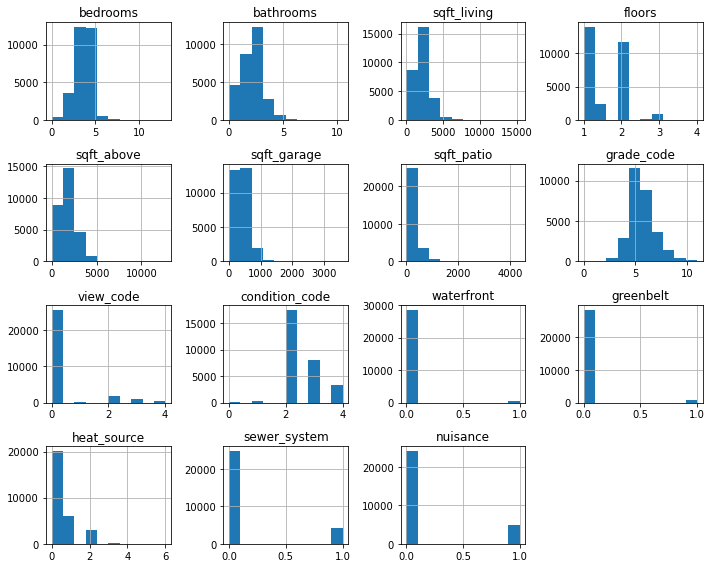

In [63]:
df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above','sqft_garage',
    'sqft_patio',"grade_code","view_code","condition_code", "waterfront", "greenbelt","heat_source","sewer_system","nuisance"]].hist(figsize=(10,8))
plt.tight_layout();

## Multiple Linear Regression Model 3 - using Zipcodes




In [64]:
housing_df2['house_age'] = pd.to_datetime(housing_df2['date']).dt.year - housing_df2['yr_built']
housing_df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,zipcode,condition_code,view_code,grade_code,house_age
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0,0,0,...,1180,0,0,40,1969,98055,3,0,5,53
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0,0,1,...,1570,1570,0,240,1950,98133,2,2,5,71
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0,0,0,...,1580,1580,0,0,1956,98178,2,2,5,65
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0,0,0,...,1090,1070,200,270,2010,98118,2,2,7,11
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,0,0,1,...,1120,550,550,30,2012,98027,2,0,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0,0,0,...,1600,1130,0,210,1921,98103,3,0,6,100
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0,0,0,...,2020,0,0,520,2011,98116,2,1,5,10
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0,0,1,...,940,920,240,110,1995,98122,2,0,5,27
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,0,0,0,...,1830,740,480,100,2006,98055,2,0,6,16


In [65]:
#first model using all variables 
base = ["bedrooms", 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_garage',
       'sqft_patio', 'yr_built', 'zipcode',
       'condition_code', 'grade_code', 'view_code', 'house_age']
#train:0.7137437946986696
#test: 0.7297729436230804
#Mean Absolute Error = 218639.15051776194 USD
#Root Mean Square Error = 763593.0579006564 USD

#first multilinear regression model, but with zipcode included now to see the diffference in the R2 values of test and trained models
model_1 = ['bedrooms', 'bathrooms',"sqft_lot",'sqft_above','floors',"sqft_basement",
         'sqft_garage','sqft_patio',"grade_code","view_code","condition_code", "zipcode"]

#train:0.6969396517958946
#test: 0.7027096942141058

#second multilinear regression model, but with zipcodes included 
model_2 = ['bedrooms', 'bathrooms', 'sqft_living','sqft_above','sqft_lot','floors',"grade_code", "view_code",
         "condition_code", 'sqft_garage', 'sqft_patio', "yr_built",
         "waterfront", "greenbelt", "nuisance", "heat_source","sewer_system", 'zipcode']

#train:0.7037014417683101
#test: 0.7079528601414495

#third model to see how taking variables out would affect the R2 
model_3 = ["bedrooms", "sqft_living", "zipcode", "grade_code", "bathrooms", "house_age"]

#train:0.6795371790085509
#test: 0.6811373450718887

y = np.log(housing_df2['price'])
X = housing_df2[model_2]



X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = .3, random_state = 42)

#Scaling the variables
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [66]:
# one hot encoding the zipcode column, and adding it as a trained and tested model
ohe = OneHotEncoder(sparse = False)

ohe_train = ohe.fit_transform(X_train[['zipcode']])
ohe_test = ohe.transform(X_test[['zipcode']])

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test  = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

In [67]:
X_train_ohe = pd.concat([X_train.drop(columns = ['zipcode']).reset_index(), ohe_train],1)
X_test_ohe = pd.concat([X_test.drop(columns = ['zipcode']).reset_index(), ohe_test],1)

In [68]:
#doing multilinear regression

lr = LinearRegression()

results = lr.fit(X_train_ohe, y_train)
print('train:{}'.format(lr.score(X_train_ohe,y_train)))
print('test: {}'.format(lr.score(X_test_ohe, y_test)))

train:0.7037014417683101
test: 0.7079528601414402


In [69]:
ohe = OneHotEncoder(sparse = False)

ohe_train = ohe.fit_transform(X_train[['zipcode']])
ohe_test = ohe.transform(X_test[['zipcode']])

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test  = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

In [70]:
# concatenating the new columns and deleting the original zipcode column
#creating the final test and train variables for X


X_train_ohe = pd.concat([X_train.drop(columns = ['zipcode']).reset_index(), ohe_train],1)
X_test_ohe = pd.concat([X_test.drop(columns = ['zipcode']).reset_index(), ohe_test],1)

In [71]:
lr = LinearRegression()

results = lr.fit(X_train_ohe, y_train)
print('train:{}'.format(lr.score(X_train_ohe,y_train)))
print('test: {}'.format(lr.score(X_test_ohe, y_test)))

train:0.7037014417683101
test: 0.7079528601414402


In [72]:
#finding the R2 value
r_squared = lr.score(X_train_ohe, y_train)
r_squared

0.7037014417683101

In [73]:
#finding the adjusted R2 value
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/ (len(y)-X_train_ohe.shape[1]-1))
adj_r2

0.7027425797696947

In [74]:
y_pred = lr.predict(X_test_ohe)
np.exp(y_pred)


array([ 666593.02147999, 1143688.35174975,  666415.00624581, ...,
        543711.18965195,  604101.1749246 ,  881663.68144385])

In [75]:
lr.score(X_test_ohe, y_test)

0.7079528601414402

In [76]:
# calculating the MAE and RMSE

MAE = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
print("Mean Absolute Error =", MAE, "USD")

RMSE = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Root Mean Square Error =", RMSE, "USD")

Mean Absolute Error = 230170.53110858955 USD
Root Mean Square Error = 774568.3218440663 USD


In [95]:
# coefficients based on variables
coeffs = pd.read_csv('Data/coefs_df.csv')
coeffs

,Unnamed: 0,0,1
0,41,x0_98039,3.352716e+06
1,20,x0_98004,1.776030e+06
2,12,waterfront,9.446988e+05
3,42,x0_98040,8.474332e+05
4,38,x0_98033,6.865762e+05
...,...,...,...
88,30,x0_98023,-5.025403e+05
89,47,x0_98051,-5.280484e+05
90,61,x0_98092,-5.400779e+05
91,25,x0_98010,-5.462027e+05


## Visuals

### grade of a home

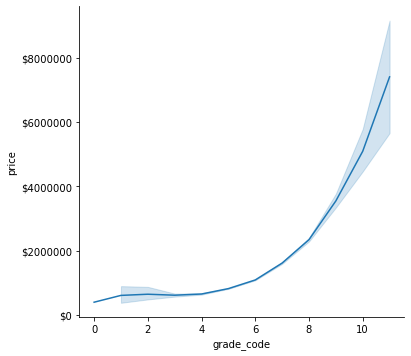

In [78]:
g = sns.relplot(data=housing_df2, x="grade_code", y="price", kind="line")
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter('${x:1.0f}')
plt.show()

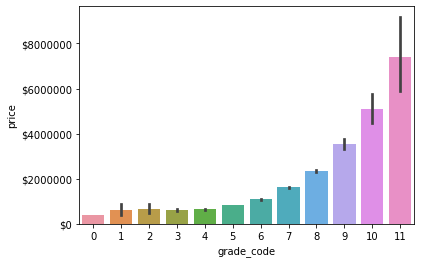

In [79]:
ax = sns.barplot(data = housing_df2, x = 'grade_code', y = 'price')
ax.yaxis.set_major_formatter('${x:1.0f}')
plt.show()

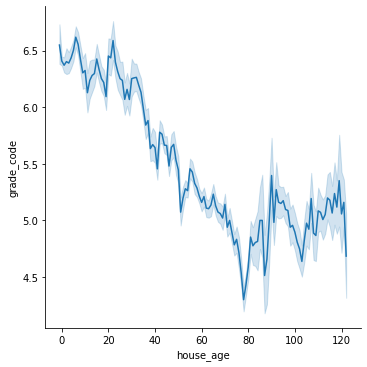

In [80]:
sns.relplot(data=housing_df2, x="house_age", y="grade_code", kind = "line")

<AxesSubplot:xlabel='grade_code', ylabel='house_age'>

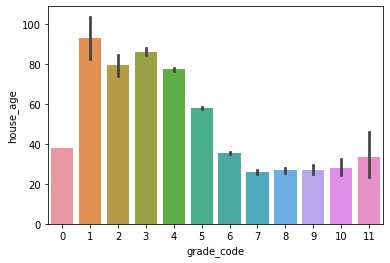

In [81]:
sns.barplot(data = housing_df2, x = 'grade_code', y = 'house_age')

### condition / house age

<AxesSubplot:xlabel='condition', ylabel='house_age'>

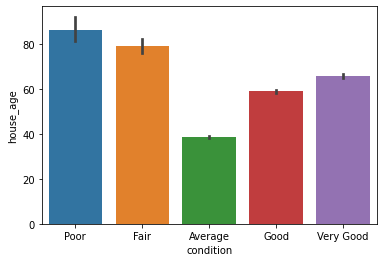

In [82]:
sns.barplot(data = housing_df2, x = 'condition', y = 'house_age')

### Residual Model Based on 3rd Model

[Text(0.5, 0, 'Fitted Value'), Text(0, 0.5, 'Residual')]

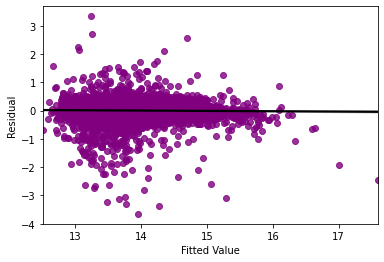

In [83]:
residual = y_test - y_pred

ax = sns.regplot(x = y_pred, y = residual, data = None, scatter = True, 
            scatter_kws={"color": "purple"}, line_kws={"color": "black"})
ax.set(xlabel='Fitted Value', ylabel='Residual')

[Text(0.5, 0, 'Fitted Value'), Text(0, 0.5, 'Residual')]

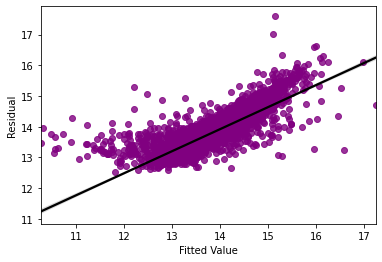

In [84]:
ax = sns.regplot(x = y_test, y = y_pred, scatter_kws={"color": "purple"}, line_kws={"color": "black"})
ax.set(xlabel='Fitted Value', ylabel='Residual')

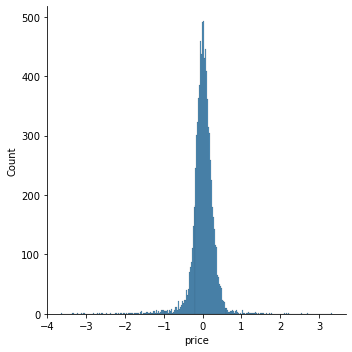

In [85]:
sns.displot(residual)

## Zipcode

In [86]:
# creating a new df with a subset of zipcode with the most values

In [87]:
housing_df2['zipcode'].value_counts().sort_values(ascending = False).head()

98042    992
98038    857
98103    761
98115    760
98117    748
Name: zipcode, dtype: int64

In [88]:
zipcode = housing_df2[(housing_df2["zipcode"] == 98039) | (housing_df2["zipcode"] == 98004)
                     | (housing_df2["zipcode"] == 98040) | (housing_df2["zipcode"] == 98033)
                     | (housing_df2["zipcode"] == 98112)]

## Price Per Zipcode

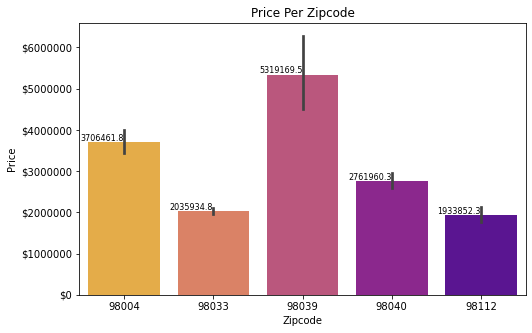

In [89]:
plt.figure(figsize=(8,5))


ax = sns.barplot(data = zipcode, x = 'zipcode', y = 'price', palette = 'plasma_r')
ax.set_title('Price Per Zipcode')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter('${x:1.0f}')

for p in ax.patches: 
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.1f}'.format(p.get_height())
    ax.text(_x,_y, value, ha = "right", fontsize = 8)


plt.show()

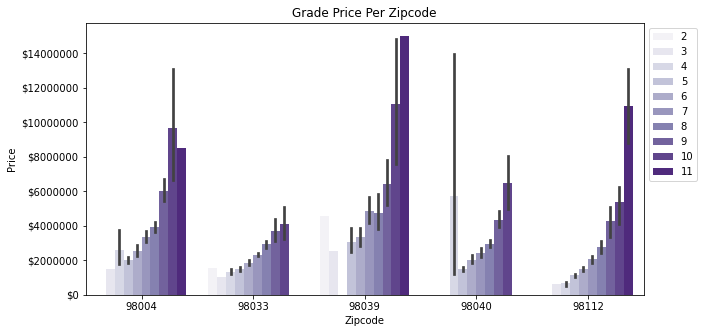

In [90]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data = zipcode, x = 'zipcode', y = 'price', hue = 'grade_code', palette = 'Purples')
ax.yaxis.set_major_formatter('${x:1.0f}')
ax.set_title('Grade Price Per Zipcode')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))
plt.show()

## Grade Per Price

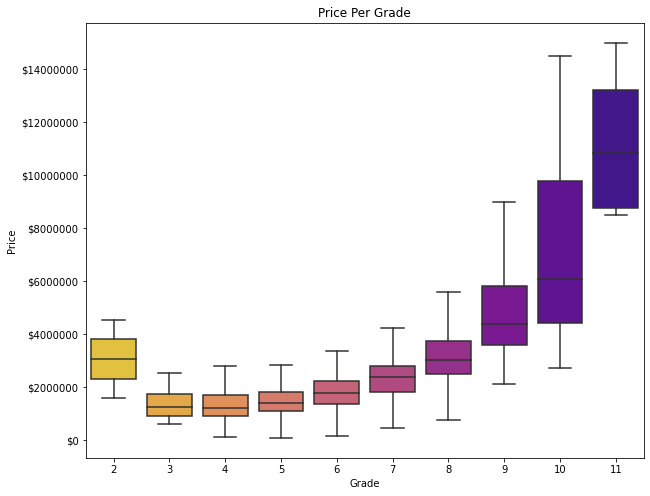

In [91]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data = zipcode, x = 'grade_code', y = 'price', palette = 'plasma_r', showfliers = False)

ax.set_title('Price Per Grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Price')

ax.yaxis.set_major_formatter('${x:1.0f}')
plt.show()

## Waterfront Per Price

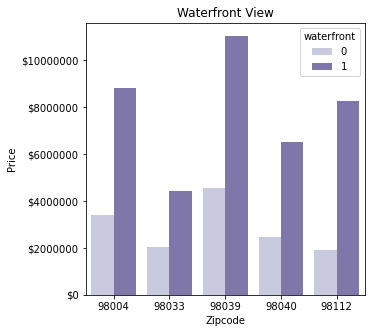

In [92]:
plt.figure(figsize=(5,5))
ax = sns.barplot(data = zipcode, x = 'zipcode', y = 'price', hue = 'waterfront', palette = 'Purples', ci=None)
ax.yaxis.set_major_formatter('${x:1.0f}')

ax.set_title('Waterfront View')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price')

plt.show()

## Price per sqft

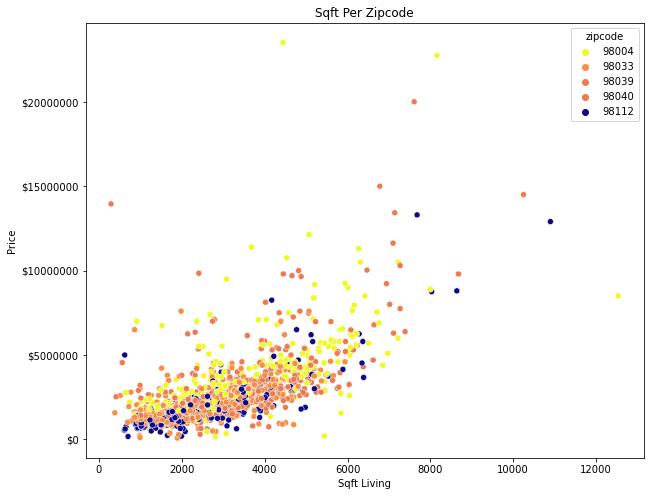

In [93]:
plt.figure(figsize=(10,8))

ax = sns.scatterplot(data = zipcode, x = 'sqft_living', y = 'price', hue = 'zipcode', palette = 'plasma_r')

ax.yaxis.set_major_formatter('${x:1.0f}')

ax.set_title('Sqft Per Zipcode')
ax.set_xlabel('Sqft Living')
ax.set_ylabel('Price')

plt.show()